In [1]:
pip install ibm_quantum_widgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import cmath
# Importing standard Qiskit libraries
from qiskit.quantum_info import Statevector, random_statevector
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit.extensions import Initialize
# Loading your IBM Quantum account(s)
api_token = 'f4fa75aeb73956d54cbbbb5a19cc8a728dcef1a738bc0e6fbc771cebbc1f2bc22879bfd0f1ad85ca0554e790a9990de14382abd681f2330ad5a4293c4489c413'
IBMQ.save_account(api_token)
provider = IBMQ.load_account()


configrc.store_credentials:WARNING:2022-04-27 13:32:41,677: Credentials already present. Set overwrite=True to overwrite.


## 1. Basic Rotations on One Qubit and Measurements on the Bloch Sphere

Before getting into complicated circuits on many qubits, let us start by looking at a single qubit. Read this chapter: https://qiskit.org/textbook/ch-states/introduction.html to learn the basics about the Bloch sphere, Pauli operators, as well as the Hadamard gate and the $S$ and $S^\dagger$ gates. 

By default, states in qiskit start in $|0\rangle$, which corresponds to "arrow up" on the Bloch sphere. Play around with the gates $X$, $Y$, $Z$, $H$, $S$ and $S^\dagger$ to get a feeling for the different rotations. To do so, insert combinations of the following code lines in the lines indicated in the program:

    qc.x(0)    # rotation by Pi around the x-axis
    qc.y(0)    # rotation by Pi around the y-axis
    qc.z(0)    # rotation by Pi around the z-axis
    qc.s(0)    # rotation by Pi/2 around the z-axis
    qc.sdg(0)  # rotation by -Pi/2 around the z-axis
    qc.h(0)    # rotation by Pi around an axis located halfway between x and z

Try to reach the given state in the Bloch sphere in each of the following exercises. (Press Shift + Enter to run a code cell)

<b> 1.) Let us start easy by performing a bit flip. The goal is to reach the state $|1\rangle$. <img src='state1.png' width="200">

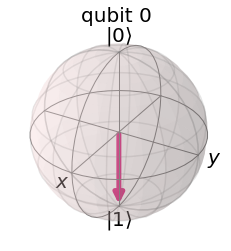

In [3]:
qc = QuantumCircuit(1)
qc.x(0)
# ex1_validation(qc)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)


 <b> 2.) Next, we would like to create superposition. The goal is to reach the state $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$. <img src='state+.png' width="200">

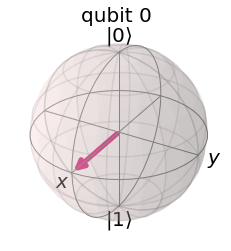

In [4]:
qc = QuantumCircuit(1)
qc.h(0)
#ex2_validation(qc)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)


 <b> 3.) For this exercise the goal is to reach the state $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$. Can you do that with any of the gates in Qiskit or do you need more than one? <img src='state-.png' width="200">

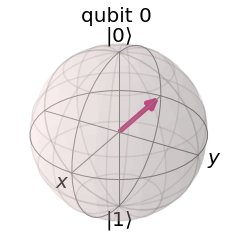

In [5]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
#ex3_validation(qc)
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

## 2. Measurements

In order to measure our results we need to store the quantum information in classical bits. We do this by writing a Quantum Circuit: `QuantumCircuit(m,n)`. Where `m` respresent the qubits and `n` the classical bits. These bits can then be read out during multiple runs, these then gives us a statistical representation of our quantum state. (In this exercise set we consider `m` and `n` to be `1`.)

<b> 1.) Measure the state below
    <img src='meas_state.png' width="200">

<ipython-input-24-fc1b4279962b>:2: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(np.pi/4,np.pi/4,np.pi/4,0)


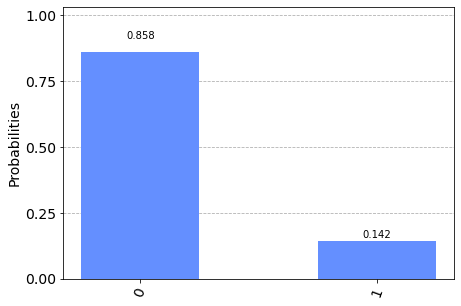

In [24]:
qc=QuantumCircuit(1,1)
qc.u3(np.pi/4,np.pi/4,np.pi/4,0)
qc.measure(0,0)

backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
Counts = execute(qc, backend, shots = 1024,  seed_simulator=312).result().get_counts() # we run the simulation and get the counts
plot_histogram(Counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities
#ex4_validation(Counts)

## <i>Bonus: Tomography</i>
 
 
 From the exercise at the top it can me made clear to simply doing a measurement in the $ \{ |0\rangle,|1\rangle\} $-basis will not tell you in which state you were exactly. It will give you at best the projection on this basis. This means that you will lose crucial information about the phase of your qubit. In this bonus exercise we will perform a process called 'state tomography'. Here instead of performing measurements in the $ \{ |0\rangle,|1\rangle\} $-basis, we will also measure the projection of the state in the $ \{ |+\rangle,|-\rangle\} $ and the $ \{ |+y\rangle,|-y\rangle\} $- basis. 
 
 You will be give a random state using the `random_state` command

In [7]:
from qiskit import *

0.251 0.8856666666666667 0.888
1.2790427844464174


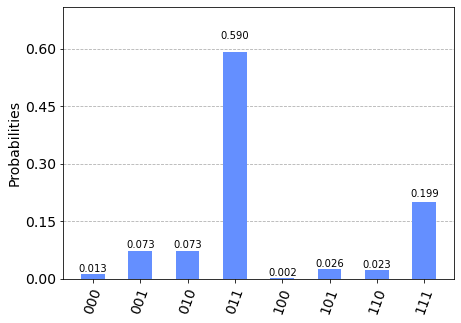

In [8]:
psi = random_statevector(2, seed=11)
init_gate = Initialize(psi)
init_gate.label = "Random State"


## Measure the state in the x,y,z basis and make a guess for the state_vector psi

qr = QuantumRegister(3)
cr = ClassicalRegister(3)

qc = QuantumCircuit(qr,cr)

qc.initialize(init_gate.params, 0)
qc.initialize(init_gate.params, 1)
qc.initialize(init_gate.params, 2)

#Measure in all three different bases
# x-axis
qc.h(0)
qc.measure(0,0)

# y-axis
qc.h(1)
qc.s(1)
qc.measure(1,1)

# z-axis
qc.measure(2,2)


shots_num = 3000
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
Counts = execute(qc, backend, shots = shots_num,  seed_simulator=312).result().get_counts() # we run the simulation and get the counts
plot_histogram(Counts)


# we ran intro problems and could not find the solution

x = (Counts['110'] + Counts['100'] + Counts['111'] + Counts['101'])/shots_num
y = (Counts['010'] + Counts['110'] + Counts['011'] + Counts['111'])/shots_num
z = (Counts['001'] + Counts['011'] + Counts['111'] + Counts['101'])/shots_num

print(x, y, z)

print(np.sqrt(x**2 + y**2 + z**2))
plot_histogram(Counts)




Find the two angles such that the state can be written as:
$$
|\psi\rangle = \begin{pmatrix}
 \cos(\theta/2)\\
 e^{i\phi}\sin(\theta/2)
\end{pmatrix}
$$

In [ ]:
angles : [phi,theta]
